In [1]:
import numpy as np
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def crear_rectangulo(N,M,v0):
    matriz = np.array(np.zeros((M,N)))
    matriz[-1][1:-1]=-v0
    matriz[0][1:-1]=v0
    return np.array(matriz)

In [3]:
def ciclo_promedio(matriz, precisionVieja):
    Npuntos = (len(matriz)*len(matriz))
    coef = (1/Npuntos)
    precision = 0
    for i in range (1,len(matriz)-1):
        for j in range (1,len(matriz[0])-1):
            V_viejo = matriz[i][j]
            matriz[i][j] = (1/4)*(matriz[i][j+1] + matriz[i][j-1] + matriz[i-1][j] + matriz[i+1][j])
            if V_viejo != 0:
                precision += abs(((matriz[i][j]-V_viejo)/V_viejo))
    
    if precision == 0:
        precision = precisionVieja
    else:
        precision = (precision*coef)
    return matriz, precision

In [4]:
def dif_finitas(N,M,v0, dl):
    matriz = crear_rectangulo(N,M,v0)
    precisionObj = 0.1
    precisionActual = 100
    i=0
    for i in range(0,100):
        matriz, precisionActual = ciclo_promedio(matriz,precisionActual)
        i+=1
    return matriz, precisionActual, i

In [5]:
N=200
M=200
v0=5
dl=2
matriz,precision,it = dif_finitas(M,N,5,2)
print("iteraciones: " + str(it) + ", precision: " + str(precision))

iteraciones: 100, precision: 0.18559137073101284


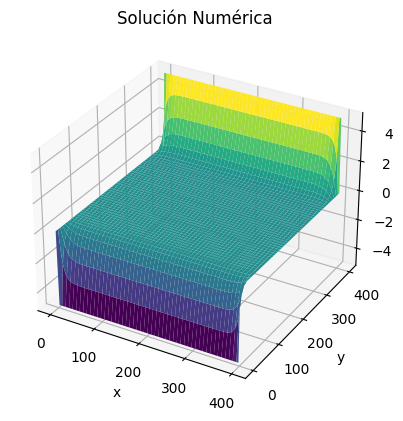

In [6]:
x = np.linspace(0,N*dl,N)
y = np.linspace(0,M*dl,M)

X,Y = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,np.flipud(matriz), cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title('Solución Numérica')

plt.show()


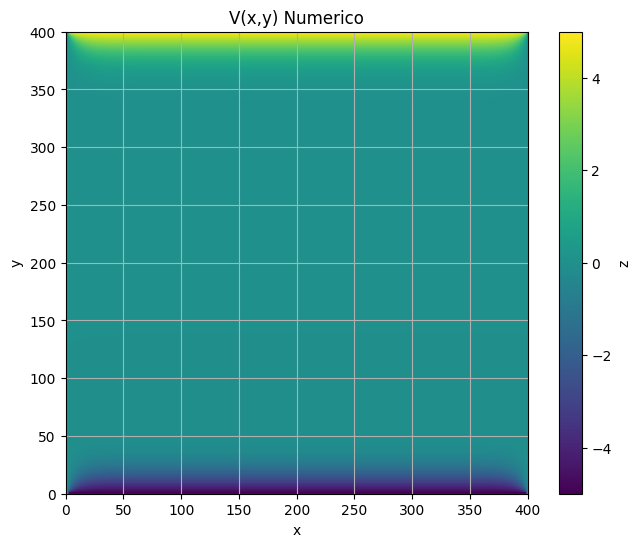

In [7]:
plt.figure(figsize=(8, 6))
plt.imshow(matriz, extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin='upper', cmap='viridis')
plt.colorbar(label='z')
plt.xlabel('x')
plt.ylabel('y')
plt.title('V(x,y) Numerico')
plt.grid(True)
plt.show()